# Hierachisches Clustering

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
from scipy.cluster.hierarchy import linkage, fcluster

## I) Für Gesamtverlauf (-25 bis 275°C)

In [8]:
file_path = "data/03_dsc_experiments_normalized.csv"

In [9]:
df_normalized = pd.read_csv(file_path, index_col=0)
df_normalized 

,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,265,266,267,268,269,270,271,272,273,274
Probe,,,,,,,,,,,,,,,,,,,,,
L001_S5,-0.414724,-0.414344,-0.414483,-0.413907,-0.413091,-0.412114,-0.411125,-0.410646,-0.410275,-0.409311,...,-0.266759,-0.266185,-0.265381,-0.264771,-0.264402,-0.263895,-0.263217,-0.262609,-0.261971,-0.261483
L002_S5,-0.435184,-0.434524,-0.434483,-0.433781,-0.432752,-0.431863,-0.431203,-0.430658,-0.430484,-0.429743,...,-0.291320,-0.291141,-0.291032,-0.290187,-0.289162,-0.288294,-0.287320,-0.286521,-0.285654,-0.284781
L003_S5,-0.428877,-0.427999,-0.427776,-0.427276,-0.426766,-0.426015,-0.424954,-0.424150,-0.423851,-0.422880,...,-0.278368,-0.277813,-0.277327,-0.276705,-0.276381,-0.275983,-0.275113,-0.274239,-0.273117,-0.272201
L004_S5,-0.421902,-0.421595,-0.421571,-0.420891,-0.420325,-0.420069,-0.419861,-0.419415,-0.419352,-0.418570,...,-0.279800,-0.279349,-0.278981,-0.278759,-0.278387,-0.277662,-0.276952,-0.276491,-0.275677,-0.274862
L005_S5,-0.391589,-0.391113,-0.390807,-0.390103,-0.389683,-0.389155,-0.388540,-0.388102,-0.388012,-0.387468,...,-0.250822,-0.249905,-0.248846,-0.247748,-0.246896,-0.246135,-0.245566,-0.245141,-0.244713,-0.244202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-0.397226,-0.396507,-0.396912,-0.396228,-0.396026,-0.395692,-0.395082,-0.394552,-0.394373,-0.393518,...,-0.200208,-0.199664,-0.198722,-0.198138,-0.197793,-0.197055,-0.196439,-0.195968,-0.195069,-0.194250
L384_S5,-0.359978,-0.359520,-0.359721,-0.359194,-0.358705,-0.358458,-0.358139,-0.357822,-0.357564,-0.356888,...,-0.079416,-0.078088,-0.077201,-0.076134,-0.075794,-0.075150,-0.073460,-0.072286,-0.071478,-0.070959
L385_S5,-0.385729,-0.385336,-0.385706,-0.385314,-0.384946,-0.384705,-0.384093,-0.383679,-0.383648,-0.383061,...,-0.183764,-0.183355,-0.182589,-0.181873,-0.181074,-0.180660,-0.179500,-0.178707,-0.177974,-0.178240


### 4) Anwendung des Hierarchischen Clusterings

In [11]:
linked = linkage(df_normalized, method="ward")

### 5) Visualisierung

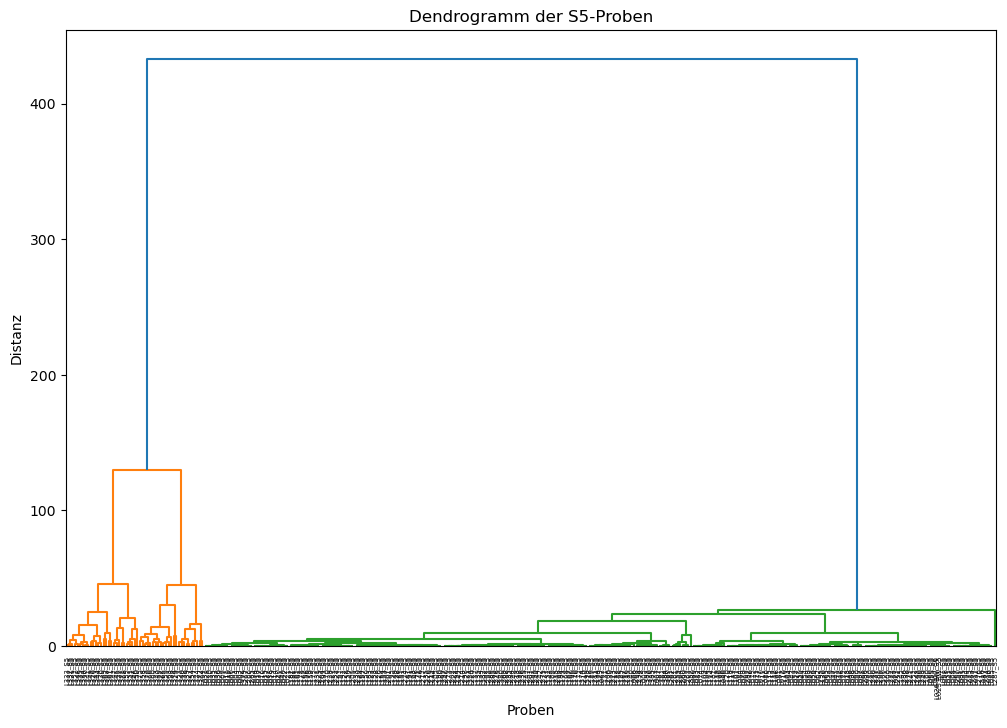

In [13]:
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=df_normalized.index,  # Proben als Beschriftungen
    orientation="top",
    distance_sort="descending",
)
plt.title("Dendrogramm der S5-Proben")
plt.xlabel("Proben")
plt.ylabel("Distanz")
plt.show()

### 6) Clusterzuordnung berechnen

#### a) Feste Anzahl an Clustern
> 5 Cluster (da 5 Sedimente/Matritzen)

In [16]:
cluster_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster_labels = cluster_model.fit_predict(df_normalized)

In [17]:
# Cluster-Zuweisung als DataFrame
cluster_assignments = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": cluster_labels
})
cluster_assignments

,Probe,Cluster
0,L001_S5,1
1,L002_S5,1
2,L003_S5,1
3,L004_S5,1
4,L005_S5,1
...,...,...
353,L383_S5,1
354,L384_S5,1
355,L385_S5,1
356,L386_S5,1


In [18]:
cluster_assignments["Cluster"].value_counts()

Cluster
1    305
2     18
0     15
4     10
3     10
Name: count, dtype: int64

#### b) Basieren auf gegebenen Cutoff Point (Distanzschwelle) 
> aus Dendogramm

In [20]:
cutoff_distance = 40  # Beispiel für den Cutoff Point
clusters = fcluster(linked, t=cutoff_distance, criterion="distance")

In [21]:
# Cluster in DataFrame speichern
cluster_results = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": clusters.flatten()  # `cut_tree` gibt ein 2D-Array zurück
})
cluster_results

,Probe,Cluster
0,L001_S5,1
1,L002_S5,1
2,L003_S5,1
3,L004_S5,1
4,L005_S5,1
...,...,...
353,L383_S5,1
354,L384_S5,1
355,L385_S5,1
356,L386_S5,1


In [22]:
cluster_results["Cluster"].value_counts()

Cluster
1    305
5     18
3     15
2     10
4     10
Name: count, dtype: int64

In [23]:
cluster_results.to_csv("data/050_simple_clustering.csv", index=True)

## II) Basierend auf Intervallen (Mittelwerten)
> eine Cluster-Zuweisung für Gesamtverlauf

In [25]:
file_path = "data/03_dsc_experiments_normalized_intervals.csv"

df_normalized = pd.read_csv(file_path, index_col=0)
df_normalized 

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-0.393431,-0.383219,-0.373145,-0.362479,-0.351026,-0.338704,-0.329780,-0.334494,-0.291703,-0.276513,-0.259814,-0.243557,-0.227633,-0.213402,-0.200450
L384_S5,-0.356280,-0.344942,-0.330514,-0.315836,-0.300962,-0.285687,-0.275729,-0.293425,-0.220209,-0.198126,-0.173821,-0.150114,-0.125819,-0.099549,-0.079439
L385_S5,-0.382964,-0.373991,-0.363618,-0.352263,-0.338732,-0.325401,-0.314765,-0.317284,-0.274411,-0.258304,-0.241273,-0.225589,-0.211926,-0.197541,-0.184160


### 2) Anwendung des Hierarchischen Clusterings

In [27]:
linked = linkage(df_normalized, method="ward")

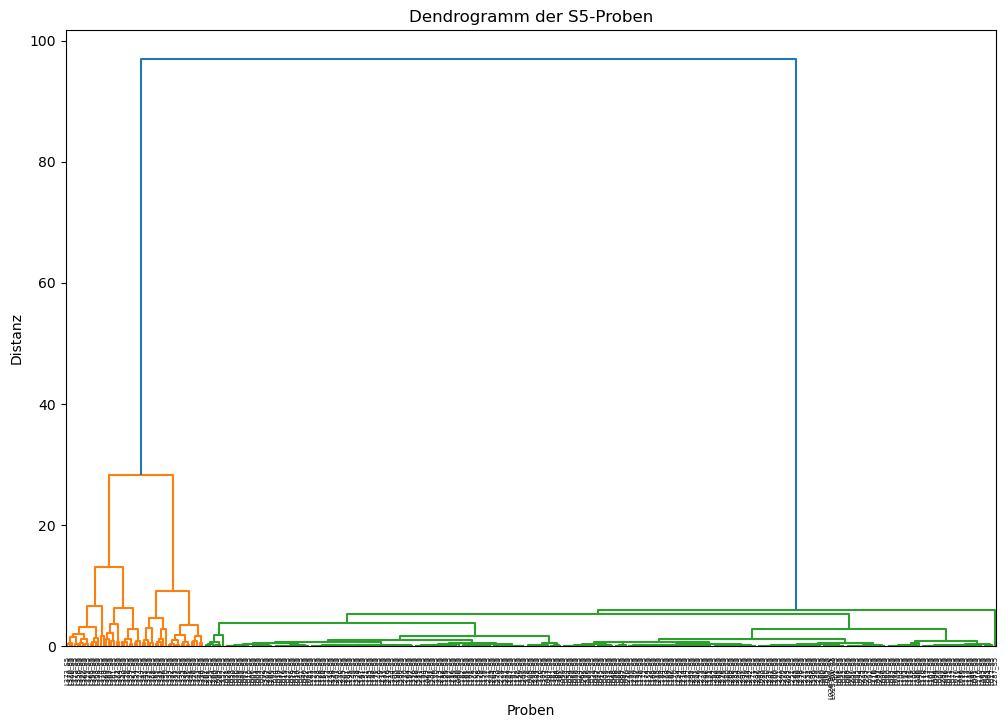

In [28]:
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=df_normalized.index,  # Proben als Beschriftungen
    orientation="top",
    distance_sort="descending",
)
plt.title("Dendrogramm der S5-Proben")
plt.xlabel("Proben")
plt.ylabel("Distanz")
plt.show()

### 3) Clusterzuordnung berechnen

#### a) Feste Anzahl an Clustern
> 5 Cluster (da 5 Sedimente/Matritzen)

In [31]:
cluster_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster_labels = cluster_model.fit_predict(df_normalized)

# Cluster-Zuweisung als DataFrame
cluster_assignments = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": cluster_labels
})
cluster_assignments

,Probe,Cluster
0,L001_S5,3
1,L002_S5,3
2,L003_S5,3
3,L004_S5,3
4,L005_S5,3
...,...,...
353,L383_S5,3
354,L384_S5,3
355,L385_S5,3
356,L386_S5,3


In [32]:
cluster_assignments["Cluster"].value_counts()

Cluster
3    305
0     15
1     14
4     14
2     10
Name: count, dtype: int64

#### b) Basieren auf gegebenen Cutoff Point (Distanzschwelle) 
> aus Dendogramm

In [34]:
cutoff_distance = 8  # Beispiel für den Cutoff Point
clusters = fcluster(linked, t=cutoff_distance, criterion="distance")


# Cluster in DataFrame speichern
cluster_results = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": clusters.flatten()  # `cut_tree` gibt ein 2D-Array zurück
})
cluster_results

,Probe,Cluster
0,L001_S5,1
1,L002_S5,1
2,L003_S5,1
3,L004_S5,1
4,L005_S5,1
...,...,...
353,L383_S5,1
354,L384_S5,1
355,L385_S5,1
356,L386_S5,1


In [35]:
cluster_results["Cluster"].value_counts()

Cluster
1    305
5     15
4     14
2     14
3     10
Name: count, dtype: int64

In [36]:
cluster_results.to_csv("data/051_mean_clustering.csv", index=True)

## III) Basierend auf Intervallen (Mittelwerten)
> Pro Interval eine Cluster-Zuweisung

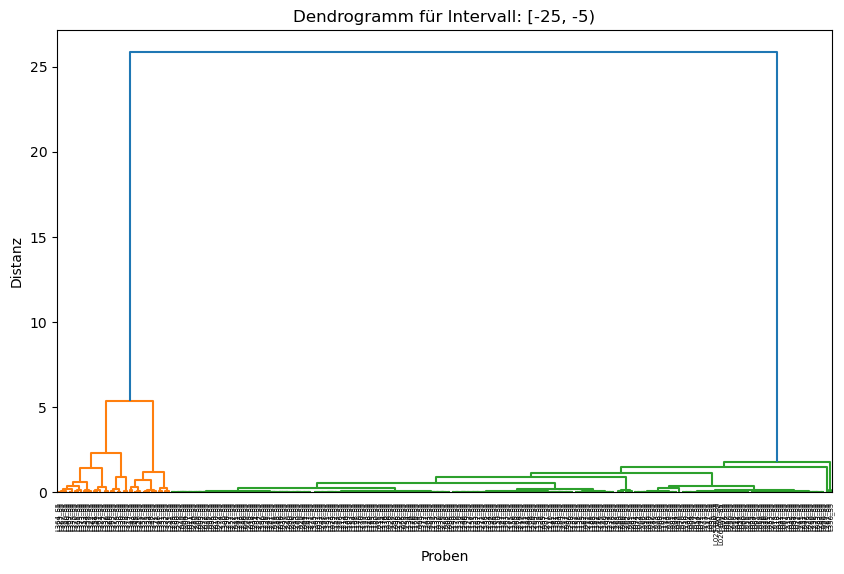

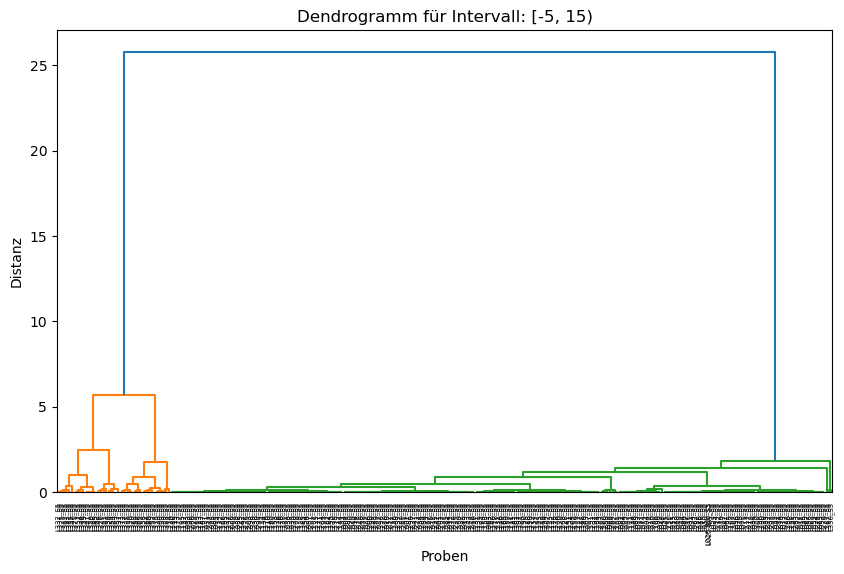

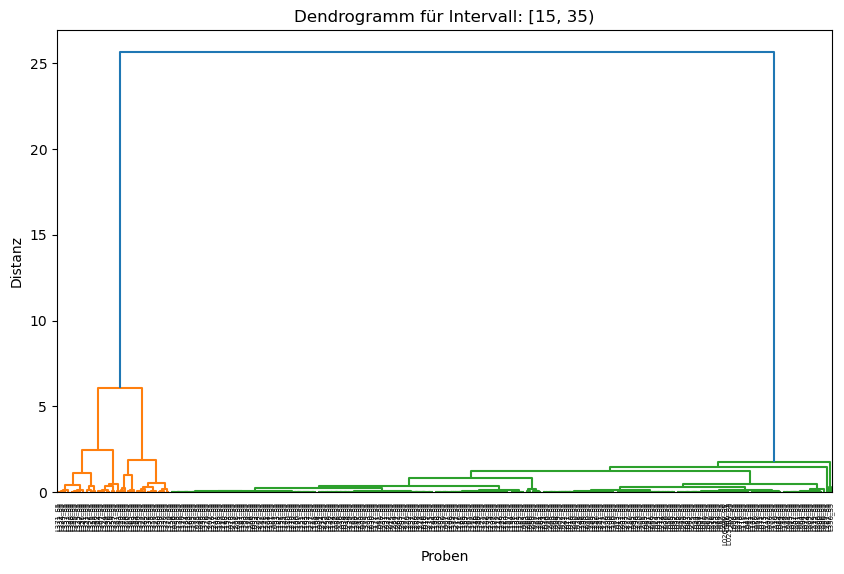

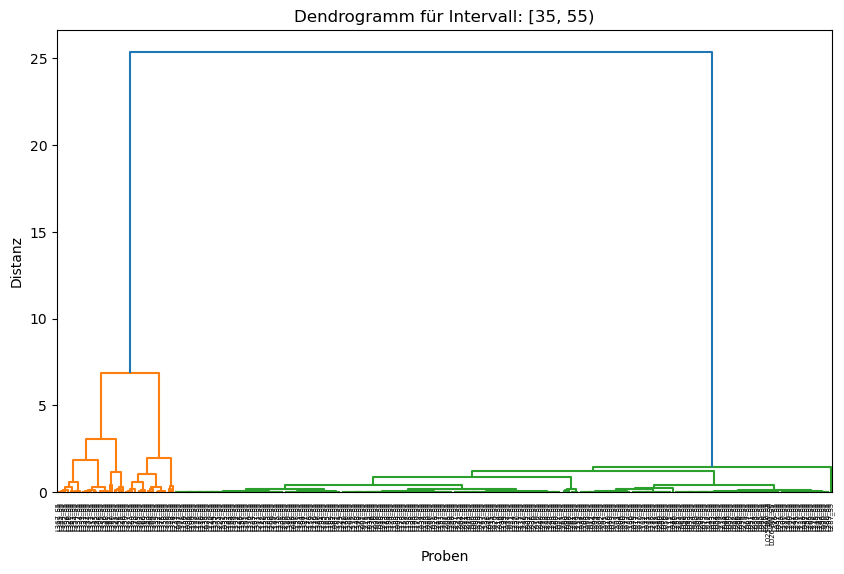

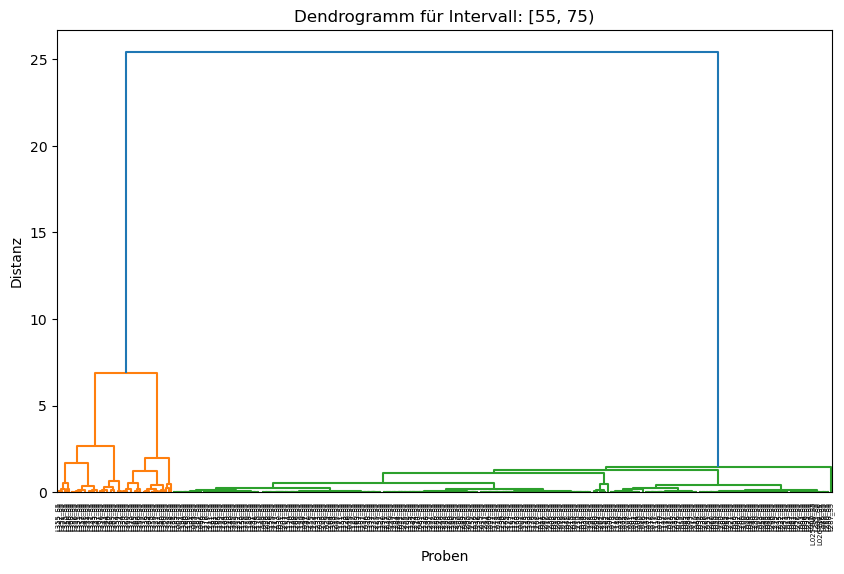

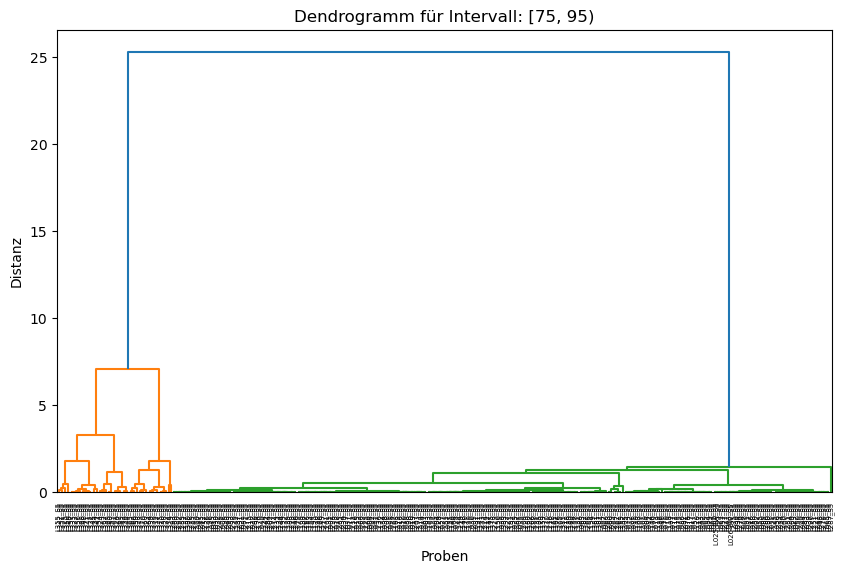

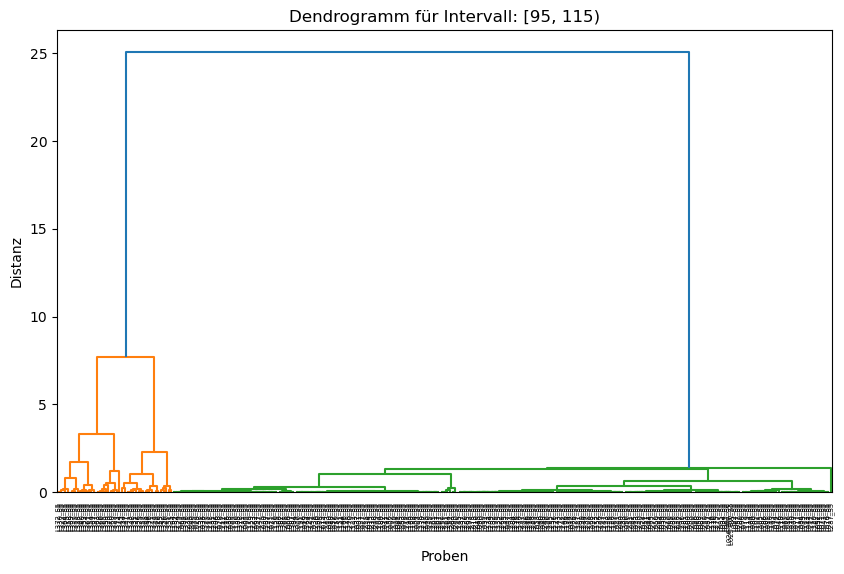

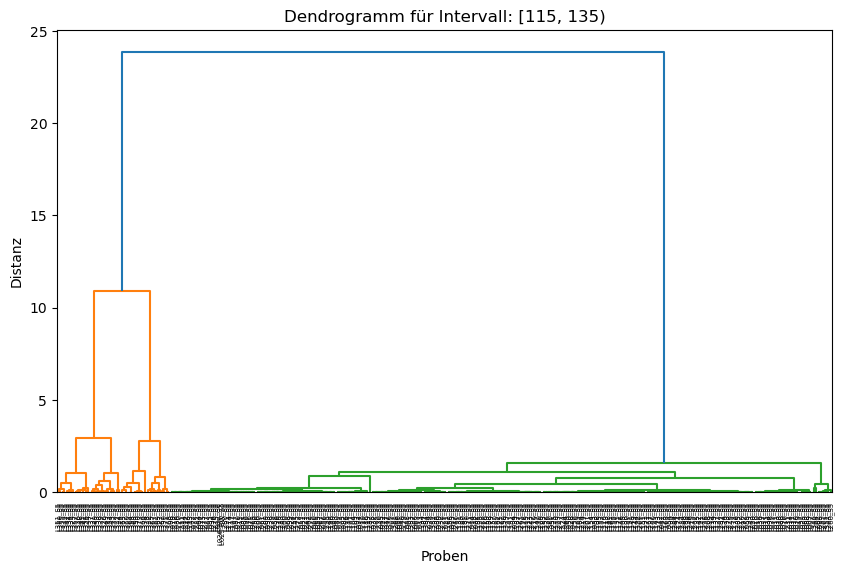

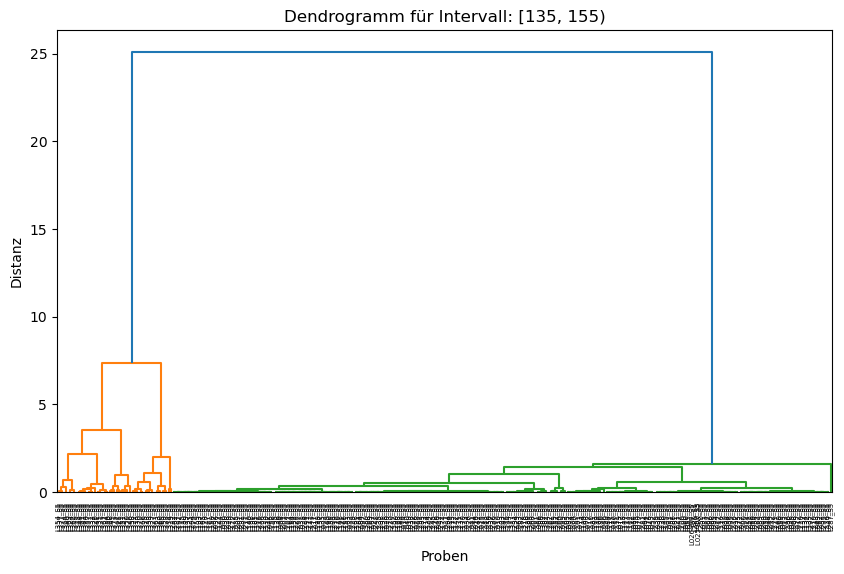

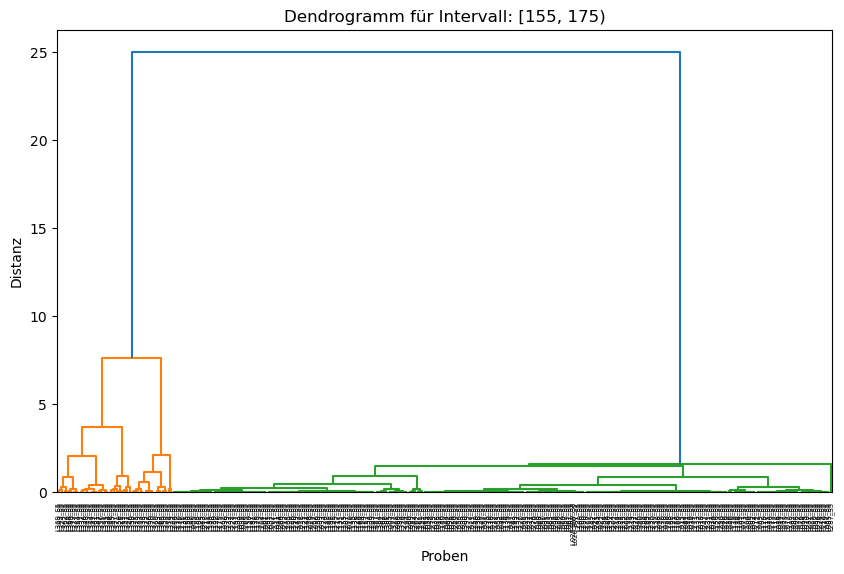

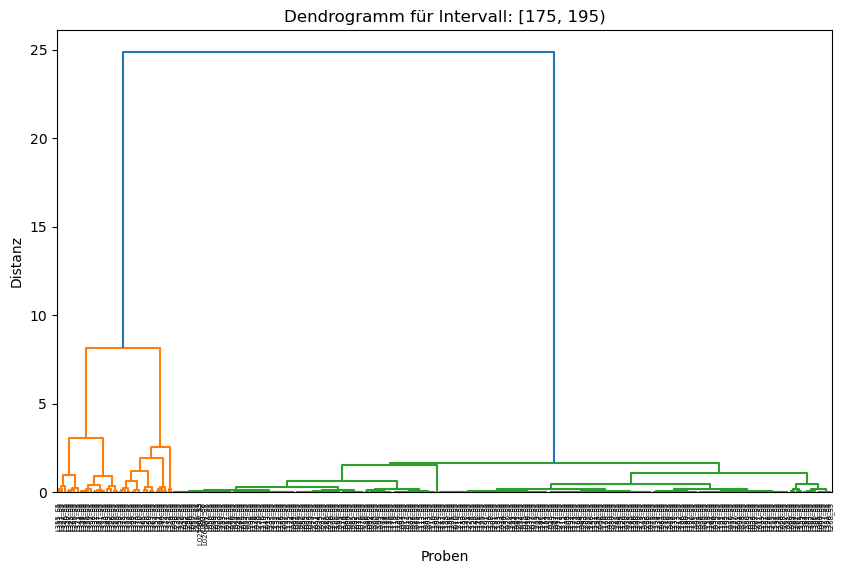

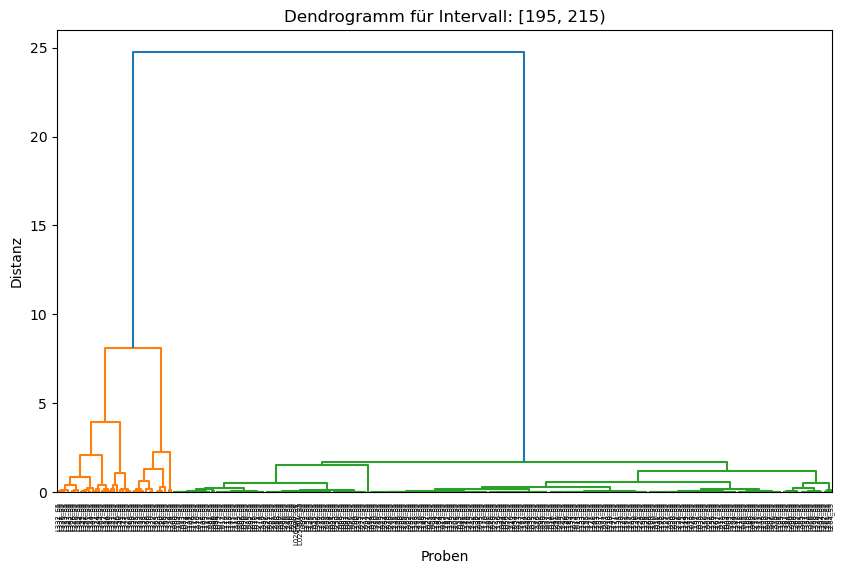

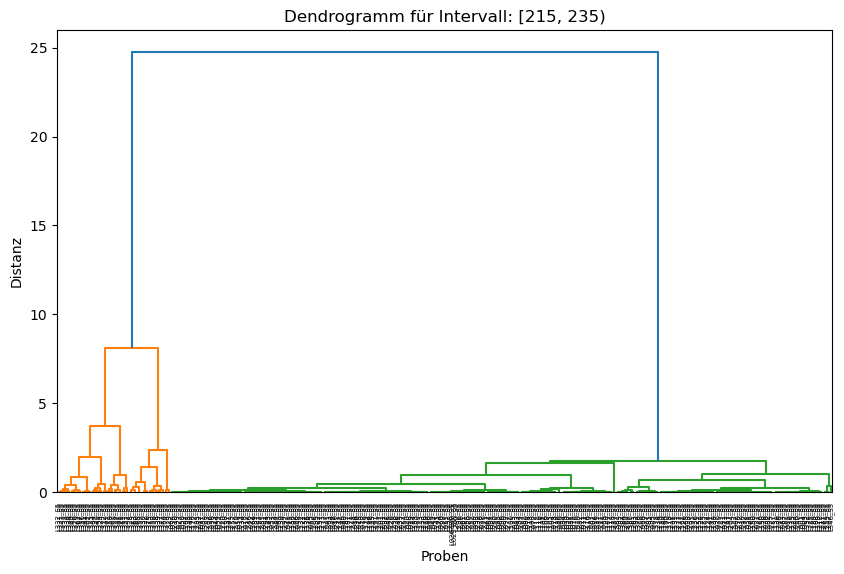

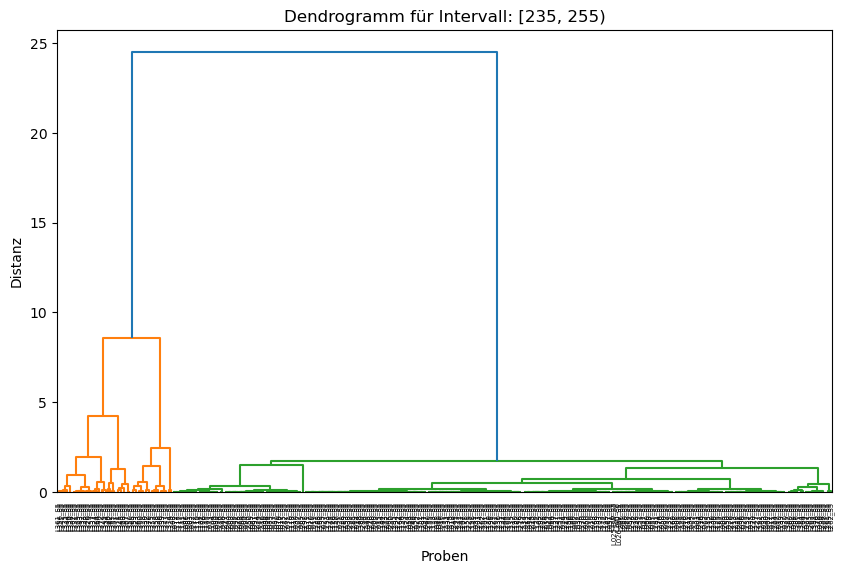

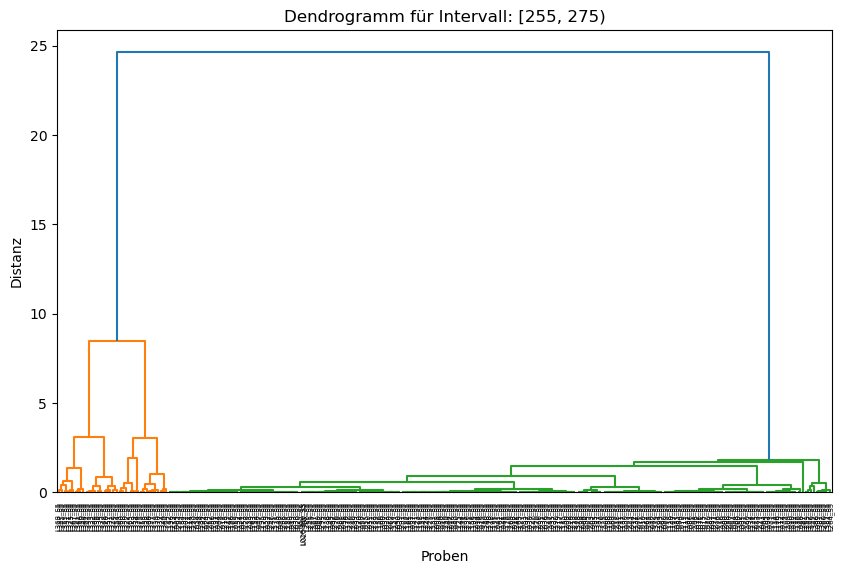

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Iteriere über jede Spalte (Intervall)
for column in df_normalized.columns:
    # Berechnung der Linkage-Matrix
    linked = linkage(df_normalized[[column]], method="ward", metric="euclidean")
    
    # Dendrogramm plotten
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation="top", distance_sort="descending", labels=df_normalized.index)
    plt.title(f"Dendrogramm für Intervall: {column}")
    plt.xlabel("Proben")
    plt.ylabel("Distanz")
    plt.show()


In [39]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# DataFrame für Cluster-Zuweisungen initialisieren
cluster_results = pd.DataFrame(index=df_normalized.index)

# Iteriere über jede Spalte (Intervall)
for column in df_normalized.columns:
    # Hierarchisches Clustering für die aktuelle Spalte
    clustering = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="ward")
    cluster_labels = clustering.fit_predict(df_normalized[[column]])
    
    # Speichere die Cluster-Zuweisung in den Ergebnissen
    cluster_results[column] = cluster_labels

# Ergebnisse anzeigen
cluster_results


,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L002_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L003_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L004_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L005_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L384_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L385_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# DataFrame für Häufigkeiten initialisieren
cluster_value_counts = {}

# Iteriere über jede Spalte (Intervall)
for column in cluster_results.columns:
    # Berechne die Häufigkeit der Cluster-Zuweisungen
    value_counts = cluster_results[column].value_counts()
    
    # Speichere die Ergebnisse in einem Dictionary
    cluster_value_counts[column] = value_counts

# Konvertiere das Dictionary in einen DataFrame für bessere Übersicht
cluster_counts_df = pd.DataFrame(cluster_value_counts).fillna(0).astype(int)

# Ergebnisse anzeigen
cluster_counts_df

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
0,24,304,304,304,305,305,305,12,305,305,305,305,306,305,307
1,303,18,7,7,11,18,11,297,17,10,17,10,10,11,13
2,19,20,18,20,20,6,18,15,9,17,10,17,17,17,13
3,9,11,11,11,6,14,10,14,10,10,18,17,16,16,15
4,2,2,16,3,3,13,6,11,15,2,2,2,2,2,8
5,1,3,2,13,13,2,8,9,2,14,6,7,7,7,2


### übergeordnetes Clustering

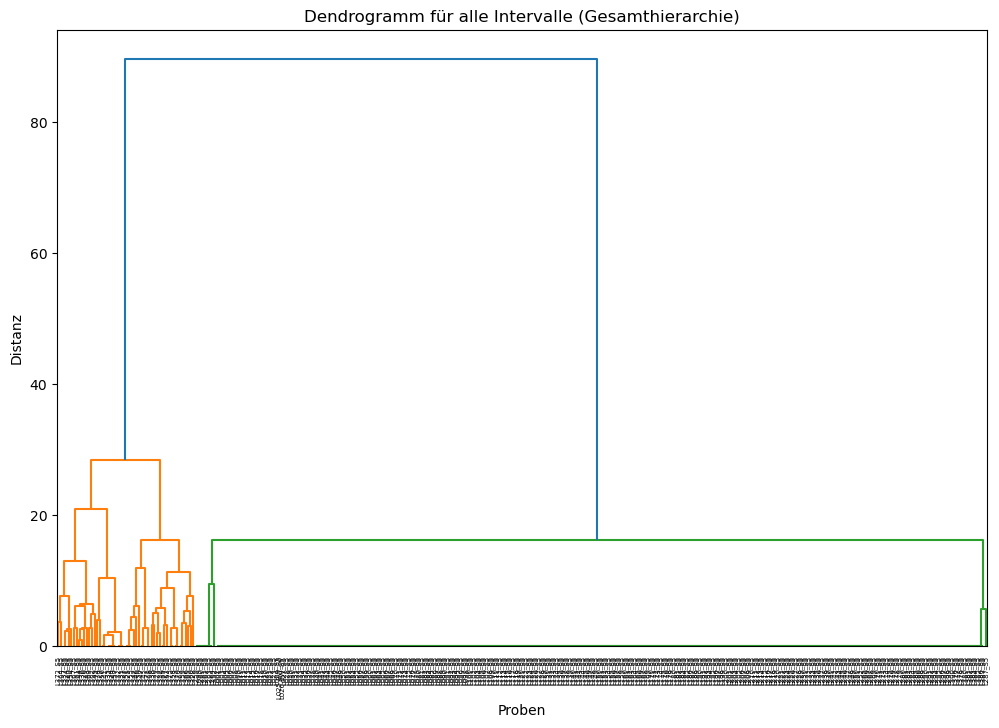

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage-Matrix für hierarchisches Clustering auf allen Intervallen
linked = linkage(cluster_results.values, method="ward", metric="euclidean")

# Dendrogramm plotten
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=cluster_results.index,  # Proben als Beschriftung
    orientation="top",
    distance_sort="descending"
)
plt.title("Dendrogramm für alle Intervalle (Gesamthierarchie)")
plt.xlabel("Proben")
plt.ylabel("Distanz")
plt.show()


In [43]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Konvertiere die Spaltennamen zu Strings
cluster_results.columns = cluster_results.columns.astype(str)

# Hierarchisches Clustering auf Basis aller Spalten (Intervalle)
clustering = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
overall_clusters = clustering.fit_predict(cluster_results.values)  # Nutze nur die Werte

# Ergebnisse als neue Spalte hinzufügen
cluster_results["Overall_Cluster"] = overall_clusters

# Ausgabe der Ergebnisse
cluster_results

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",Overall_Cluster
Probe,,,,,,,,,,,,,,,,
L001_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L002_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L003_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L004_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L005_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L384_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L385_S5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
# Häufigkeiten der Cluster-Zuweisungen berechnen
cluster_counts = cluster_results["Overall_Cluster"].value_counts()
cluster_counts.sort_index()

Overall_Cluster
0    305
1     10
2     15
3     11
4     17
Name: count, dtype: int64

In [45]:
cluster_results.to_csv("data/052_interval_multiple_clustering.csv", index=True)